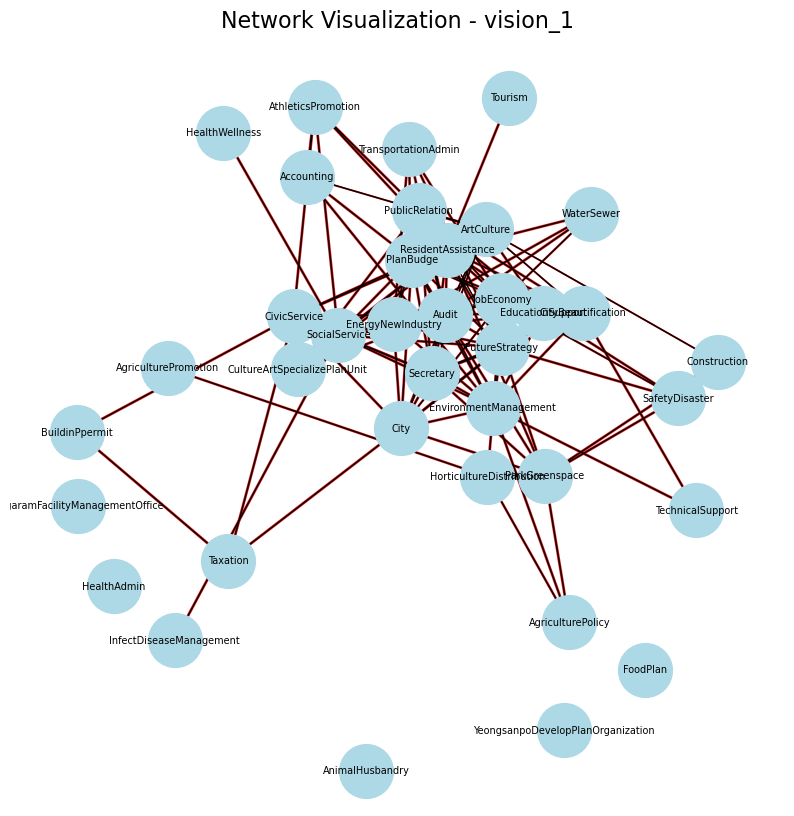

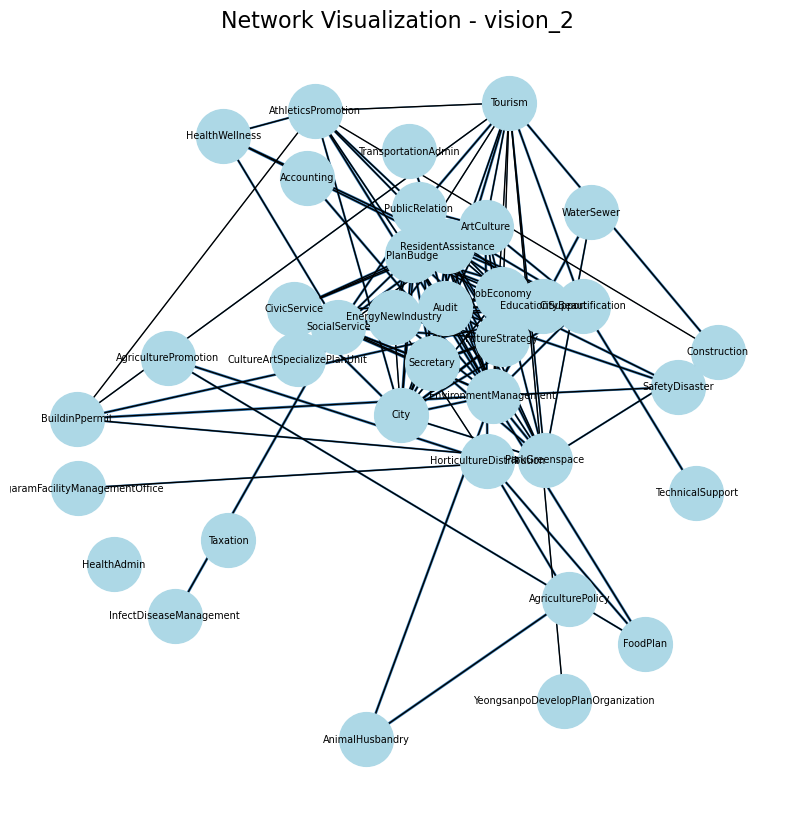

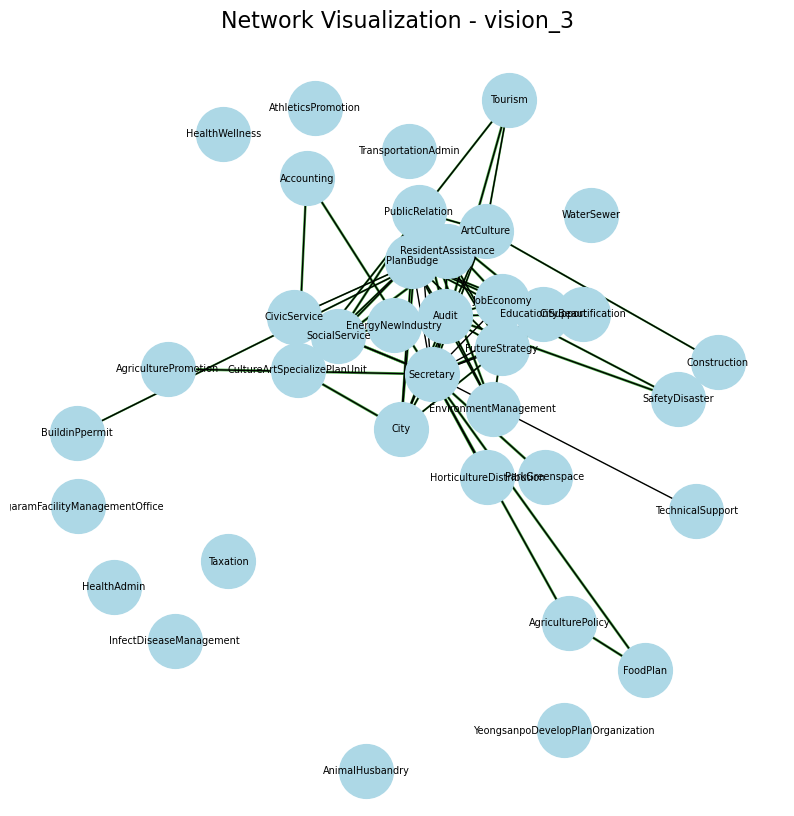

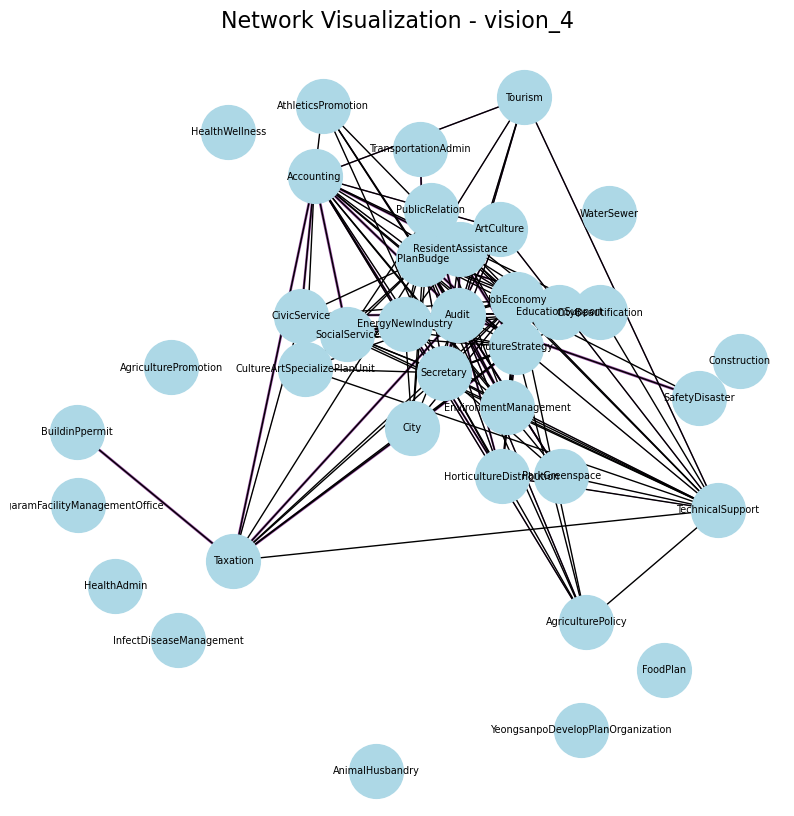

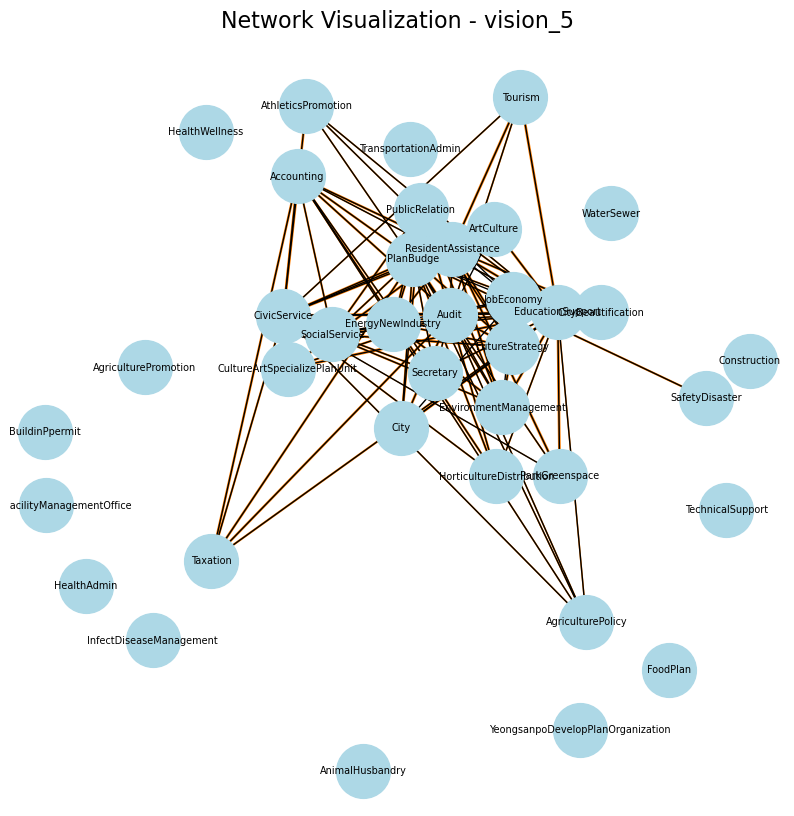

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import pandas as pd
import os
%matplotlib inline

nodes_file = "Department_Collaborate_node.csv"
nodes_df = pd.read_csv(nodes_file, header=None, names=["id", "label"])
edges_folder = "Department_Collaborate_Vision/"
layer_networks = {}

for edge_file in os.listdir(edges_folder):
    if edge_file.endswith("_edges.csv"):
        layer_name = edge_file.replace("_edges.csv", "")
        edge_path = os.path.join(edges_folder, edge_file)
        edges_df = pd.read_csv(edge_path)

        G = nx.Graph()

        for _, row in nodes_df.iterrows():
            G.add_node(row['id'], label=row['label'])

        for _, row in edges_df.iterrows():
            G.add_edge(row['Start_Node'], row['End_Node'], weight=row['Weight'], layer=layer_name)

        layer_networks[layer_name] = G

layer_colors = plt.cm.Set1(range(len(layer_networks)))
layer_to_color = {layer_name: color for layer_name, color in zip(layer_networks.keys(), layer_colors)}

pos = nx.spring_layout(list(layer_networks.values())[0], k=80.0, iterations=250)

for layer_name, G in layer_networks.items():
    plt.figure(figsize=(10, 10))

    edges = list(G.edges(data=True))
    weights = [d['weight'] for _, _, d in edges]

    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v) for u, v, _ in edges],
        edge_color=[layer_to_color[layer_name]] * len(edges),
        width=[w / max(weights) * 2 for w in weights] 
    )

    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), 
            node_size=1500, node_color="lightblue", font_size=7, font_color="black")
    
    plt.title(f"Network Visualization - {layer_name}", fontsize=16)
    plt.savefig(f"Graph_images/{layer_name}_network.png", transparent=True)
    plt.show()

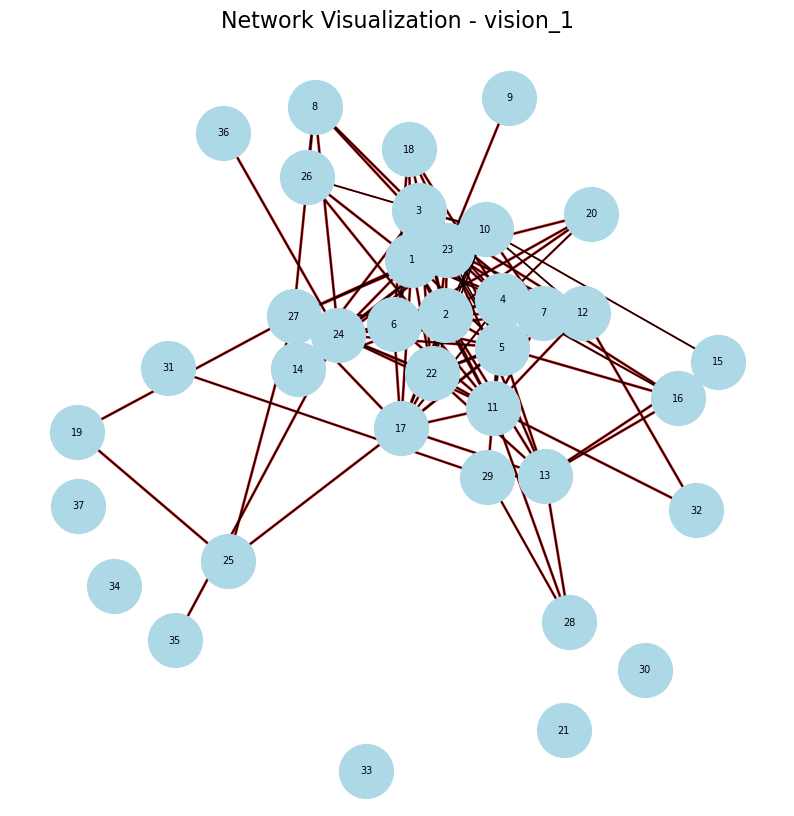

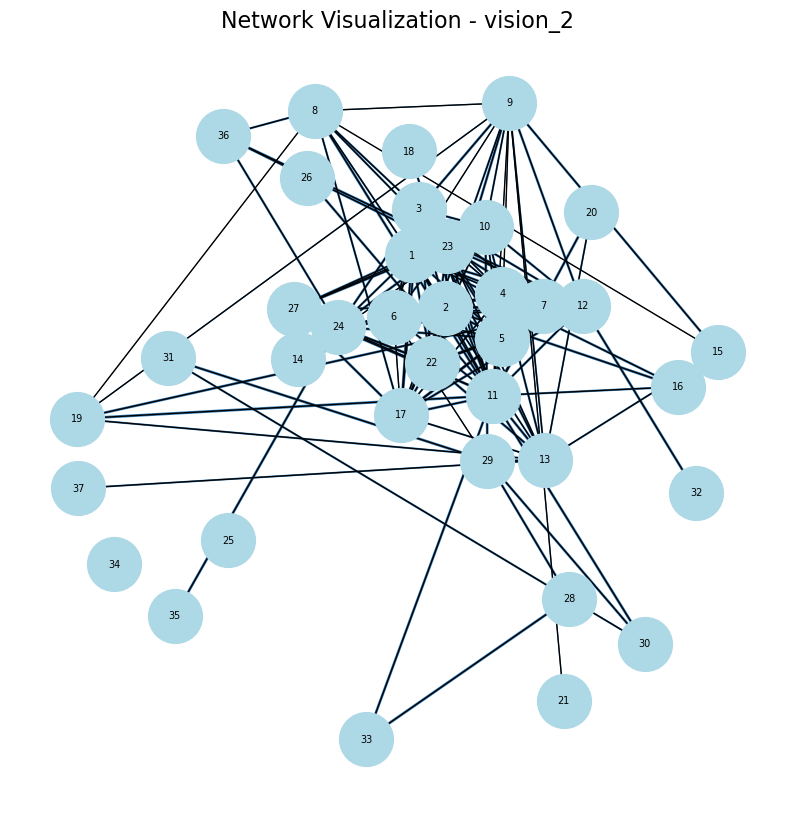

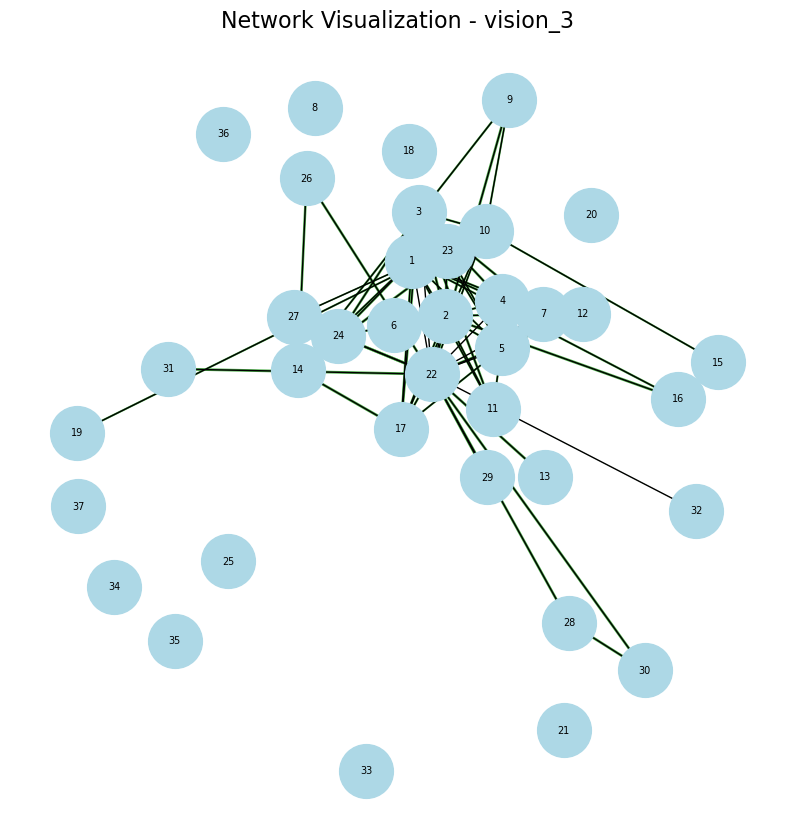

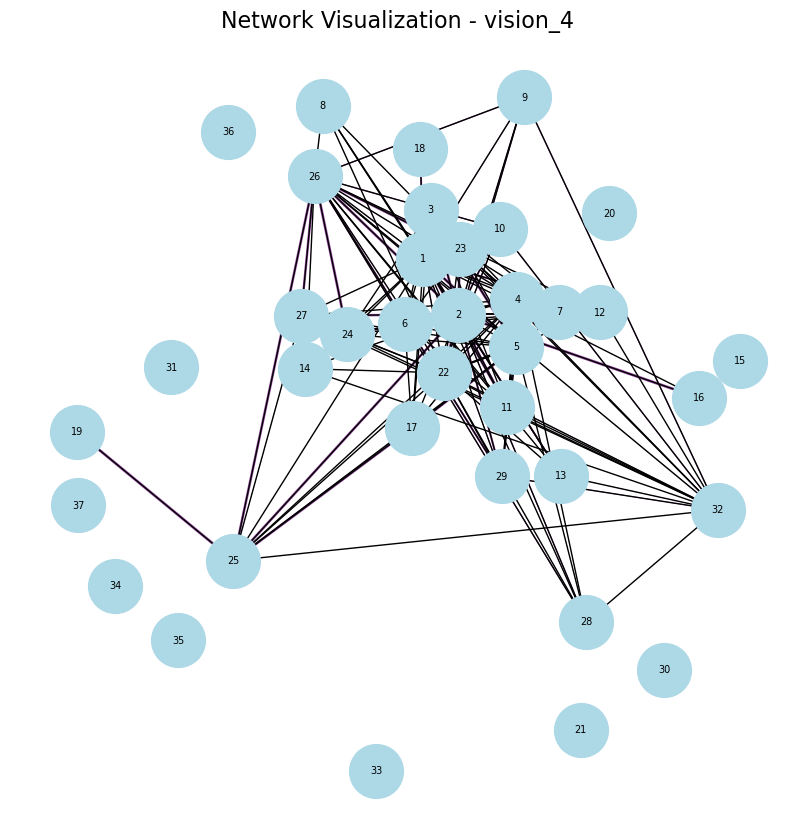

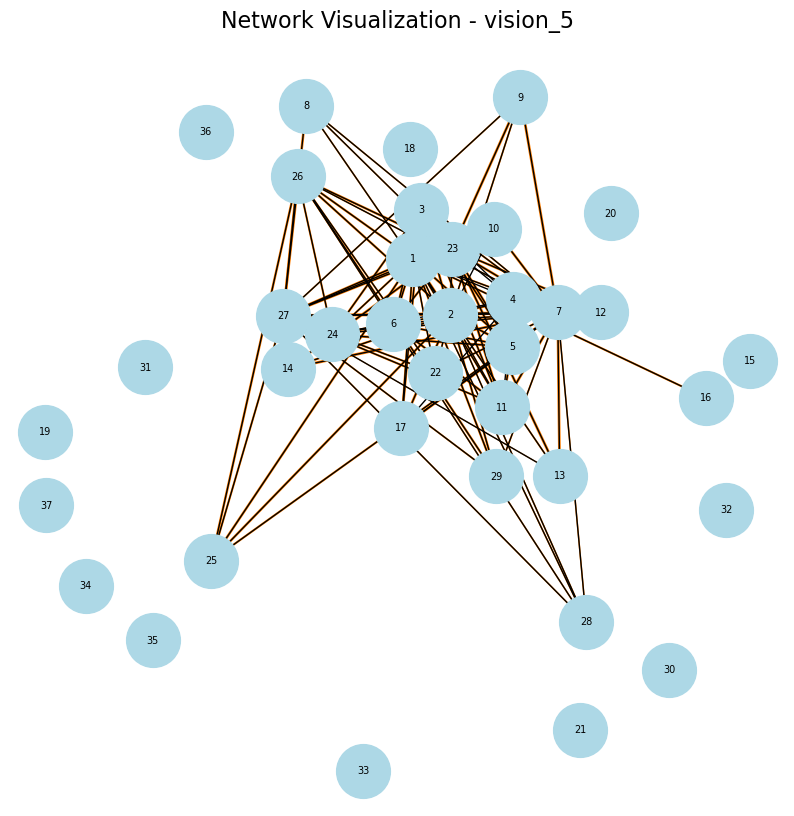

In [10]:
for layer_name, G in layer_networks.items():
    plt.figure(figsize=(10, 10))

    edges = list(G.edges(data=True))
    weights = [d['weight'] for _, _, d in edges]

    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v) for u, v, _ in edges],
        edge_color=[layer_to_color[layer_name]] * len(edges),
        width=[w / max(weights) * 2 for w in weights] 
    )

    nx.draw(G, pos, with_labels=True, labels={node: node for node in G.nodes()}, 
            node_size=1500, node_color="lightblue", font_size=7, font_color="black")
    
    plt.title(f"Network Visualization - {layer_name}", fontsize=16)
    plt.savefig(f"Graph_images/{layer_name}_network_id.png", transparent=True)
    plt.show()